# Jupiter notebook for the second seminar

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import trange
%config InlineBackend.figure_format = 'svg' 
from pylab import rcParams
rcParams['figure.figsize'] = 8,5
%matplotlib inline

Code from before the task

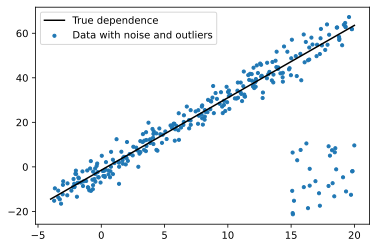

In [45]:
true_function = lambda x: 3.25 * x - 1.47
noize_function = lambda x: (
    np.random.normal(size=len(x)) * 4. +
    np.where(
        x < 15,
        0.,
        -60 + np.random.normal(size=len(x)) * 10
    ) * (np.random.uniform(size=len(x)) < 0.4).astype(int)
)
limits = (-4., 20.)

def generate_dataset(N=300):
  x = np.random.uniform(*limits, size=N)
  y = true_function(x) + noize_function(x)

  return x, y

X, y = generate_dataset()

x = np.linspace(*limits, 101)
plt.plot(x, true_function(x), c='black', label='True dependence')
plt.scatter(X, y, s=10, label='Data with noise and outliers')
plt.legend()
plt.show()

We need to make a linear model with MAE loss and compare it with linear regression

In [48]:
w = np.array([0.,0.])
stepsOfLearning = 1000
learningRate = 0.1

100%|██████████| 1000/1000 [00:00<00:00, 24195.02it/s]


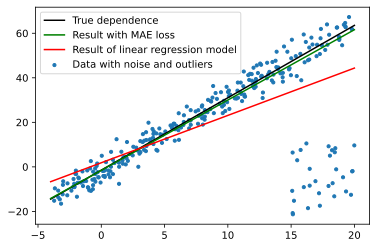

In [49]:
for _ in trange(stepsOfLearning):
    signs = w[1] * X + w[0] - y
    signs[signs>0]=1
    signs[signs<0]=-1
    w[1] = w[1] - learningRate * np.sum(X * signs) / len(X)
    w[0] = w[0] - learningRate * np.sum(signs) / len(X)

from sklearn.linear_model import LinearRegression
regressiveModel = LinearRegression()
regressiveModel.fit(X[:,None],y)

a = np.linspace(*limits,101)
plt.plot(x, true_function(x), c='black', label='True dependence')
plt.plot(a,w[1]*a+w[0],color='green',label='Result with MAE loss')
plt.plot(a,regressiveModel.predict(a[:,None]),color='red',label='Result of linear regression model')
plt.scatter(X, y, s=10, label='Data with noise and outliers')
plt.legend()
plt.show()

We see that linear model with MAE loss performs better than linear regression. That is because of the outliers we have in our toy dataset. If some points are very far away from the majority of data, that will be crucial with MSE metrics, because it uses square of the distance to the prediction, which makes MAE more robust to work with data consisting outliers.